In [1]:
clean_up = True # if True, remove all gams related files from working folder before starting
%run stdPackages.ipynb
os.chdir(main)
%run stdPlotting.ipynb
os.chdir(d['py'])
from mCGE import CGE

The file _gams_py_gdb3.gdx is still active and was not deleted.
The file _gams_py_gdb4.gdx is still active and was not deleted.
The file _gams_py_gdb5.gdx is still active and was not deleted.


####  Load and run CGE ```Model``` instance

In [2]:
name = 'vA_2019_CGE'
M = CGE.load(os.path.join(d['data'], name))

Now, we can interact with the data in the same way as before - for instance solving the model with a simple statement:

In [3]:
M.db.mergeInternal() # we do not store the gdx version of the file automatically, so we have to rewrite it here
sol = M.solve(state = 'B')

Verify that the solution is the same:

array([[<Axes: xlabel='t'>, <Axes: xlabel='t'>, <Axes: xlabel='t'>],
       [<Axes: xlabel='t'>, <Axes: xlabel='t'>, <Axes: xlabel='t'>]],
      dtype=object)

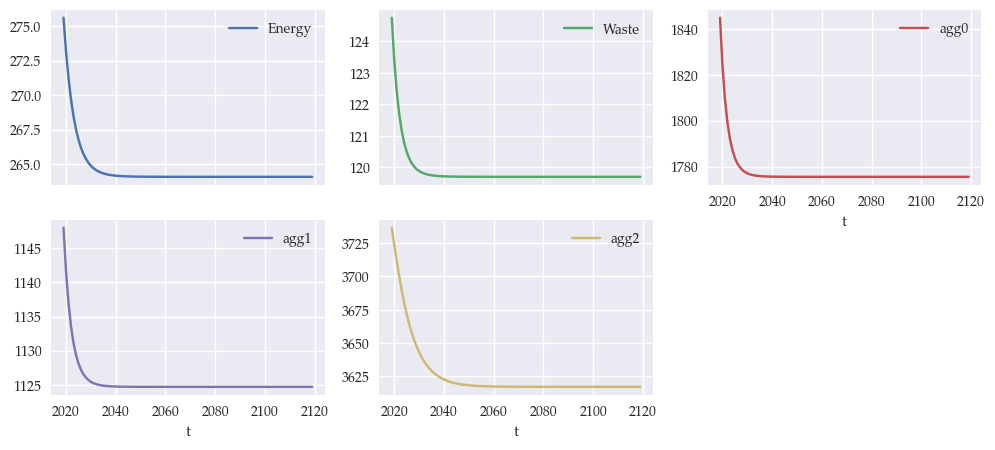

In [13]:
sol('qD').xs('K',level='n').unstack('s').plot(subplots=True, layout = (2,3), figsize = (12,5))

####  Load and run CGE from gams

Move all relevant gams and gdx files to the work folder:

In [17]:
gms = os.path.join(d['gams'], f'{M.name}.gms') # name of gms file
gmy = os.path.join(d['gams'], f'{M.name}.gmy') # name of gmy file
gdx = os.path.join(d['data'], f'{M.db.name}.gdx') # name of database file
[shutil.copy(f, os.path.join(d['work'], os.path.basename(f))) for f in (gms,gmy,gdx)]; # create copies in work folder

To run GAMS from Python, we need a ```GamsWorkspace```. As we already have one open from above, we just use that here:

In [18]:
ws = M.db.ws

Create ```GamsJob``` from file and run:

In [19]:
job = ws.add_job_from_file(os.path.join(d['work'], os.path.basename(gms)))
job.run() # run model

We can extract solution now as:

In [20]:
soldb = GpyDB(job.out_db, ws = ws)

and verify that the solution is the same:

array([[<Axes: xlabel='t'>, <Axes: xlabel='t'>, <Axes: xlabel='t'>],
       [<Axes: xlabel='t'>, <Axes: xlabel='t'>, <Axes: xlabel='t'>]],
      dtype=object)

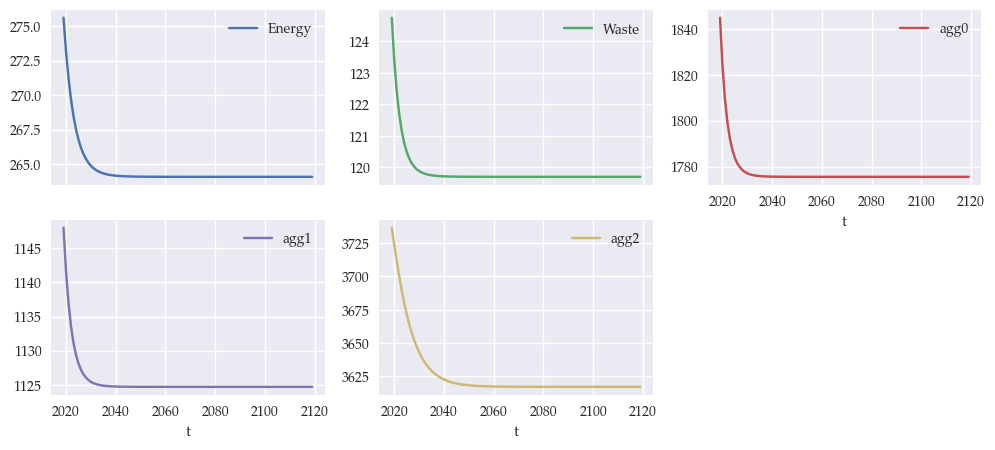

In [22]:
soldb('qD').xs('K',level='n').unstack('s').plot(subplots=True, layout = (2,3), figsize = (12,5))